In [1]:
#https://maxhalford.github.io/prince/mca/

import pandas as pd
import prince
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class MCA:

    def getCoordinates(self,data):
        mca = prince.MCA(
            n_components=data.shape[1],
            copy=True,
            check_input=True,
            engine='sklearn')     
        mca = mca.fit(data)
        coordinates_row =  mca.row_coordinates(data)
        coordinates_column = mca.column_coordinates(data)
        return coordinates_row, coordinates_column

In [3]:
data = pd.read_csv(r"..\data\data_categories.csv")

mca = MCA()
coordinates_row,coordinates_column = mca.getCoordinates(data)

FileNotFoundError: [Errno 2] No such file or directory: '..\\data\\data_categories.csv'

In [58]:
coordinates_row

,0,1,2,3,4,5
0,-0.017923,-0.008041,-4.448176e-09,-0.016549,-0.107216,-0.119188
1,-0.017923,-0.008041,-4.448176e-09,-0.016549,-0.107216,-0.119188
2,-0.017923,-0.008041,-4.448176e-09,-0.016549,-0.107216,-0.119188
3,-0.017923,-0.008041,-4.448176e-09,-0.016549,-0.107216,-0.119188
4,-0.017923,-0.008041,-4.448176e-09,-0.016549,-0.107216,-0.119188
...,...,...,...,...,...,...
6995,0.046028,-0.009726,1.213674e-08,0.041258,0.743012,0.039056
6996,-0.017923,-0.008041,-4.448176e-09,-0.016549,-0.107216,-0.119188
6997,-0.020156,-0.018863,-7.051541e-08,-0.041253,-0.154471,0.856161
6998,-0.020156,-0.018863,-7.051541e-08,-0.041253,-0.154471,0.856161


In [59]:
import numpy as np
import math
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

class Kmeans:

	def get_K_from_points(self,data):
		X = data
		scores = []
		for n in range( 2,self.__proposedAmount(len(X)) ):
			kmeans = KMeans(n_clusters=n).fit(X)
			cluster_labels = kmeans.fit_predict(X)
			scores.append( kmeans.inertia_ )
		print("SCORES: ",scores)

	def __proposedAmount(self,data_size):
		segmentsAmount = 1 + 3.3 * math.log10(data_size)
		return math.ceil(segmentsAmount)

In [60]:
kmeans = Kmeans()
kmeans.get_K_from_points(coordinates_row)

SCORES:  [8752.590813030201, 6418.576969571708, 4085.2138033042825, 2925.4783339301853, 2286.977936358065, 1657.1540295479583, 1080.2102359583823, 528.3463399778846, 45.147317253845934, 1.6783497731472605, 0.771913426618665, 0.3942316155650844]


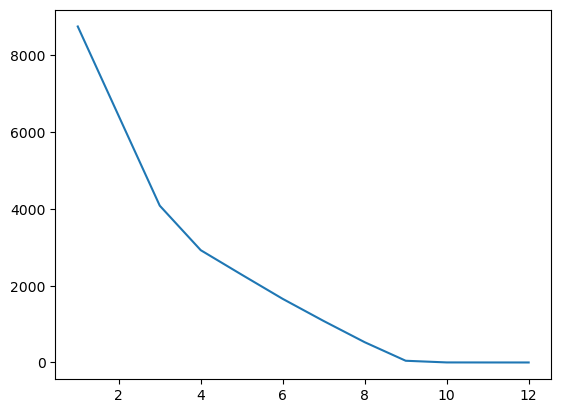

In [62]:
values = [8752.590813030201, 6418.576969571708, 4085.2138033042825, 2925.4783339301853, 2286.977936358065, 1657.1540295479583, 1080.2102359583823, 528.3463399778846, 45.147317253845934, 1.6783497731472605, 0.771913426618665, 0.3942316155650844]
plt.plot(range(1,len(values)+1),values)